#              Employees Churn Analysis Python Project

**Department:** *School of Business & Economics* 

**Course:** *ISM 6357 Business Intelligence-Analytic Methods & Programming*

**From:** *Stuti Sharma*



## Goal:

To predict employee attrition in a company using the dataset. This is a binary classification case which is utilizing several attributes to predict whether the employee will leave the company or not.

## Dataset:

The dataset has been taken from Kaggle.com (https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)
This is a fictional data set created by IBM data scientists.This dataset has 34 features and a target label 'Attrition' with 1470 instances. 

Below are the features which use integer values to represent the specific catogories. 

**Education:**  1 'Below College' 
            2 'College' 
            3 'Bachelor' 
            4 'Master' 
            5 'Doctor'

**EnvironmentSatisfaction:**1 'Low' 
                        2 'Medium' 
                        3 'High' 
                        4 'Very High'

**JobInvolvement:** 1 'Low' 
                2 'Medium' 
                3 'High' 
                4 'Very High'

**JobSatisfaction:** 1 'Low' 
                 2 'Medium' 
                 3 'High' 
                 4 'Very High'

**PerformanceRating:** 1 'Low' 
                   2 'Good' 
                   3 'Excellent' 
                   4 'Outstanding'

**RelationshipSatisfaction:** 1 'Low' 
                          2 'Medium' 
                          3 'High' 
                          4 'Very High'

**WorkLifeBalance:**1 'Bad' 
                2 'Good' 
                3 'Better' 
                4 'Best'

## *Code:*


#### Import Libraries

In [46]:
import pandas as pd                                         #import Pandas library
import numpy as np                                          #import NumPy Library
import seaborn as sns                                       #this allows plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt                             #import matplotlib's pyplot as plt to plot graphs
from matplotlib import cm                                   # To give various colors to pie chart
from scipy import stats                                     #import the stats method from scipy
import warnings                                             # disable generated warnings
warnings.filterwarnings("ignore")


## 1. Load Data

In [34]:
#Load data 

path = 'C:\\Users\\stuti\\Desktop\\Python_Project\\'
url = path + 'IBM_HR_Employee_Attrition.csv'
churn_data = pd.read_csv(url)

D = churn_data.copy()                                       #dummy dataframe for later use
rows, column = churn_data.shape                             #display total number of rows & columns
print ('Total number of rows = {}'.format(rows))
print ('Total number of columns = {}'.format(column))

churn_data.head(10)                                         #display first 10 rows

Total number of rows = 1470
Total number of columns = 35


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


## 2. Data Preparation

### 2.1 Missing Data

In this section, we are looking for any missing values in the dataset. If there are any missing values, depending on the type of distribution of missing values and the type of attribute, we need to either elliminate the observations with missing values, or replace them with suitable values. 

In [35]:
#Finding Missing Values

churn_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### 2.2 Data type 

The dataset contains different types of data which includes both numerical and catagorical. Most of the selected datamodels we are planning to use, requires the datatype to be numerical. So in this section, we are trying to find the datatype of all the features and convert the selected ones to numerical datatype. 

In [36]:
#Print data types of every column

col_datatype = churn_data.dtypes
print col_datatype

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [37]:
#Conversion of columns with "object" data type into integer int32" data type

churn_data['AttritionInt'] = (churn_data['Attrition']=='Yes').astype(int)              #Created new coulumn "AttritionInt" to capture integer values (Yes=1, No=0)
churn_data['Male'] = (churn_data['Gender']=='Male').astype(int)                        #Created new coulumn "Male" to capture integer values (Male=1, Female=0)
churn_data['Adult'] = (churn_data['Over18']=='Y').astype(int)
churn_data['OverTimeInt'] = (churn_data['OverTime']=='Yes').astype(int)

churn_data.drop(['Attrition','Gender','Over18','OverTime'], axis=1, inplace=True)     # Remove the old columns

churn_data.head(10)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AttritionInt,Male,Adult,OverTimeInt
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,0,1,6,4,0,5,1,0,1,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,3,3,10,7,1,7,0,1,1,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,3,3,0,0,0,0,1,1,1,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,3,8,7,3,0,0,0,1,1
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,3,3,2,2,2,2,0,1,1,0
5,32,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,...,2,2,7,7,3,6,0,1,1,0
6,59,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,...,3,2,1,0,0,0,0,0,1,1
7,30,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,...,2,3,1,0,0,0,0,1,1,0
8,38,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,...,2,3,9,7,1,8,0,1,1,0
9,36,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,...,3,2,7,7,7,7,0,1,1,0


In [38]:
#Create dummy variables for BusinessTravel, Department, MaritalStatus 

BusinessTravel_dummies = pd.get_dummies(churn_data.BusinessTravel, prefix='BT')               #Created new coulumn "BusinessTravel_dummies" to capture integer values for 3 catogories (BT_Non-Travel, BT_Travel_Frequently, BT_Travel_Rarely)
churn_data = pd.concat([churn_data, BusinessTravel_dummies], axis=1)                          #Concatenate the original DataFrame and the dummy DataFrame

Department_dummies = pd.get_dummies(churn_data.Department, prefix='Dept.')
churn_data = pd.concat([churn_data, Department_dummies], axis=1)

MaritalStatus_dummies = pd.get_dummies(churn_data.MaritalStatus, prefix='Status')
churn_data = pd.concat([churn_data, MaritalStatus_dummies], axis=1)

churn_data.drop(['BusinessTravel','Department','MaritalStatus'], axis=1, inplace=True)         # Remove the old columns

churn_data.head(10)

,Age,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,OverTimeInt,BT_Non-Travel,BT_Travel_Frequently,BT_Travel_Rarely,Dept._Human Resources,Dept._Research & Development,Dept._Sales,Status_Divorced,Status_Married,Status_Single
0,41,1102,1,2,Life Sciences,1,1,2,94,3,...,1,0,0,1,0,0,1,0,0,1
1,49,279,8,1,Life Sciences,1,2,3,61,2,...,0,0,1,0,0,1,0,0,1,0
2,37,1373,2,2,Other,1,4,4,92,2,...,1,0,0,1,0,1,0,0,0,1
3,33,1392,3,4,Life Sciences,1,5,4,56,3,...,1,0,1,0,0,1,0,0,1,0
4,27,591,2,1,Medical,1,7,1,40,3,...,0,0,0,1,0,1,0,0,1,0
5,32,1005,2,2,Life Sciences,1,8,4,79,3,...,0,0,1,0,0,1,0,0,0,1
6,59,1324,3,3,Medical,1,10,3,81,4,...,1,0,0,1,0,1,0,0,1,0
7,30,1358,24,1,Life Sciences,1,11,4,67,3,...,0,0,0,1,0,1,0,1,0,0
8,38,216,23,3,Life Sciences,1,12,4,44,2,...,0,0,1,0,0,1,0,0,0,1
9,36,1299,27,3,Medical,1,13,3,94,3,...,0,0,0,1,0,1,0,0,1,0


### 2.3 Feature Engineering

* New Features generated for easy analysis and visualization:
    * Created 5 Bins for Age of the employees which contains ages from 18 to 60 years. This step is taken for simpler understanding of the age group which is most likely to leave the company.
    * Created 4 Bins for Distance from Home - containing miles from 1 to 30. This step is taken to show the influence of the distance range on the attrition rate.
    * Created a new column "HoursWorked_per_Day" = [(MonthlyIncome / HourlyRate)/20] The new column would help to determine the average hours an employee worked per day. We assumed 20 working days in a month.
    

In [39]:
#Create 5 bins for 'Age' with intervals of 10

Age_label = ['Years:18-28', 'Years:29-39', 'Years:40-50', 'Years:51-60']            #Formation of Labels
bins = [18, 29, 40, 51, 60]                                                         #Formation of bins
Age_dummies = pd.get_dummies(pd.cut(churn_data.Age, bins, labels=Age_label))        #Create dummy variable "Age_dummies"    
churn_data = pd.concat([churn_data, Age_dummies], axis=1)                           #Concatenate the original DataFrame and the dummy variable

#Create bins for 'DistanceFromHome' with intervals of 9

Distance_label = ['Miles:1-10', 'Miles:11-20', 'Miles:21-30']
bins = [1, 11, 21, 30]
Distance_dummies = pd.get_dummies(pd.cut(churn_data.DistanceFromHome, bins, labels=Distance_label))
churn_data = pd.concat([churn_data, Distance_dummies], axis=1)


#Create New Feature 'HoursWorked_per_Day' = (MonthlyIncome / HourlyRate)/20

churn_data['HoursWorked_per_Day'] = ((churn_data['MonthlyIncome'] / churn_data['HourlyRate'])/20).astype('int64')        # Create new feature of int data type


churn_data.drop(['Age','DistanceFromHome'], axis=1, inplace=True)                #Remove old coulmns
churn_data.head()                                                                #Display 5 rows



,DailyRate,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,...,Status_Married,Status_Single,Years:18-28,Years:29-39,Years:40-50,Years:51-60,Miles:1-10,Miles:11-20,Miles:21-30,HoursWorked_per_Day
0,1102,2,Life Sciences,1,1,2,94,3,2,Sales Executive,...,0,1,0,0,1,0,0,0,0,3
1,279,1,Life Sciences,1,2,3,61,2,2,Research Scientist,...,1,0,0,0,1,0,1,0,0,4
2,1373,2,Other,1,4,4,92,2,1,Laboratory Technician,...,0,1,0,1,0,0,1,0,0,1
3,1392,4,Life Sciences,1,5,4,56,3,1,Research Scientist,...,1,0,0,1,0,0,1,0,0,2
4,591,1,Medical,1,7,1,40,3,1,Laboratory Technician,...,1,0,1,0,0,0,1,0,0,4


### 2.4 Correlation

**Feature Selection:**  Correlation is a technique for investigating the relationship between two quantitative, continuous variables. Pearson's correlation coefficient (r) is a measure of the strength of the association between the two variables. P-value less than or equal to the significance level is considered statistically significant. Typical significant values for are 0.1, 0.05, and 0.01.In our project we are using 0.01 i.e 99% confidence level. 

In [40]:
# Pearson Correlation
print "Correlation Between Features"
print churn_data.corr()                                                #Display the correlation between the features

# Display the P-values
from scipy.stats import pearsonr

print "Correlation Between Features with P-values"
def correlation_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

correlation_pvalues(churn_data)                                  # Features with P-values <= 0.01 are considered.

Correlation Between Features
                              DailyRate  Education  EmployeeCount  \
DailyRate                      1.000000  -0.016806            NaN   
Education                     -0.016806   1.000000            NaN   
EmployeeCount                       NaN        NaN            NaN   
EmployeeNumber                -0.050990   0.042070            NaN   
EnvironmentSatisfaction        0.018355  -0.027128            NaN   
HourlyRate                     0.023381   0.016775            NaN   
JobInvolvement                 0.046135   0.042438            NaN   
JobLevel                       0.002966   0.101589            NaN   
JobSatisfaction                0.030571  -0.011296            NaN   
MonthlyIncome                  0.007707   0.094961            NaN   
MonthlyRate                   -0.032182  -0.026084            NaN   
NumCompaniesWorked             0.038153   0.126317            NaN   
PercentSalaryHike              0.022704  -0.011111            NaN   
Perfo

,DailyRate,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,Status_Married,Status_Single,Years:18-28,Years:29-39,Years:40-50,Years:51-60,Miles:1-10,Miles:11-20,Miles:21-30,HoursWorked_per_Day
DailyRate,0,0.5197,1,0.0506,0.4819,0.3704,0.077,0.9095,0.2414,0.7678,...,0.125,0.0036,0.2138,0.2319,0.4122,0.4005,0.9357,0.7724,0.3603,0.9317
Education,0.5197,0,1,0.1069,0.2986,0.5204,0.1039,0.0001,0.6652,0.0003,...,0.943,0.8732,0,0,0.01,0.0026,0.231,0.7821,0.6908,0.0196
EmployeeCount,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
EmployeeNumber,0.0506,0.1069,1,0,0.4996,0.1776,0.7919,0.478,0.0763,0.57,...,0.0387,0.1775,0.8126,0.6566,0.8849,0.1601,0.3076,0.0945,0.85,0.2075
EnvironmentSatisfaction,0.4819,0.2986,1,0.4996,0,0.056,0.7512,0.963,0.7949,0.8105,...,0.3954,0.7292,0.5812,0.7048,0.5297,0.2833,0.5735,0.367,0.1462,0.2167
HourlyRate,0.3704,0.5204,1,0.1776,0.056,0,0.1005,0.2859,0.0062,0.5451,...,0.1627,0.2001,0.3168,0.908,0.2419,0.5594,0.1927,0.8595,0.1392,0
JobInvolvement,0.077,0.1039,1,0.7919,0.7512,0.1005,0,0.6285,0.4106,0.5585,...,0.2778,0.0828,0.0888,0.9194,0.4299,0.3235,0.3837,0.0448,0.1035,0.4009
JobLevel,0.9095,0.0001,1,0.478,0.963,0.2859,0.6285,0,0.9406,0,...,0.0527,0.0008,0,0,0,0,0.8176,0.1245,0.1172,0
JobSatisfaction,0.2414,0.6652,1,0.0763,0.7949,0.0062,0.4106,0.9406,0,0.784,...,0.6927,0.3465,0.5023,0.412,0.4515,0.7558,0.5692,0.4797,0.6965,0.4154
MonthlyIncome,0.7678,0.0003,1,0.57,0.8105,0.5451,0.5585,0,0.784,0,...,0.0295,0.0006,0,0,0,0,0.5235,0.0808,0.3576,0


**We have now created a new data frame "churn_data_new" to store all the important features based on Pearson correlation coefficient for the further data analysis.**

In [41]:
# Drop the irrelevant coulumns

X = churn_data.drop(['AttritionInt', 'JobRole', 'EducationField', 'EmployeeNumber', 'EmployeeCount', 'Adult'], axis=1)       # Dropped all the irrelevant attributes.
feature_names = X.columns                                                                               # X- collection of Features
Y = churn_data.AttritionInt                                                                             # Y-Label

# Use of Select_K_best_Classifier to select top 30 important features from the dataset
from sklearn.feature_selection import SelectKBest, f_classif  

select_k_best_classifier = SelectKBest(score_func=f_classif, k=30)
select_k_best_classifier.fit_transform(X, Y)
mask = select_k_best_classifier.get_support()

new_features=[]                                                                                        # Collect all the important features in "new_features"
for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)

print "Selected features", new_features

# Create new Dataframe "churn_data_new" to store all the important features
churn_data_new = X[new_features] 
churn_data_new['AttritionInt'] = Y                                              # Adding the Label to the new dataframe

rows, column = churn_data_new.shape
print ('Total number of columns = {}'.format(column))

churn_data_new.head()

Selected features ['DailyRate', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 'OverTimeInt', 'BT_Non-Travel', 'BT_Travel_Frequently', 'BT_Travel_Rarely', 'Dept._Research & Development', 'Dept._Sales', 'Status_Divorced', 'Status_Married', 'Status_Single', 'Years:18-28', 'Years:29-39', 'Years:40-50', 'Miles:1-10', 'Miles:11-20', 'Miles:21-30', 'HoursWorked_per_Day']
Total number of columns = 31


,DailyRate,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,Status_Married,Status_Single,Years:18-28,Years:29-39,Years:40-50,Miles:1-10,Miles:11-20,Miles:21-30,HoursWorked_per_Day,AttritionInt
0,1102,2,3,2,4,5993,1,0,8,0,...,0,1,0,0,1,0,0,0,3,1
1,279,3,2,2,2,5130,4,1,10,3,...,1,0,0,0,1,1,0,0,4,0
2,1373,4,2,1,3,2090,2,0,7,3,...,0,1,0,1,0,1,0,0,1,1
3,1392,4,3,1,3,2909,3,0,8,3,...,1,0,0,1,0,1,0,0,2,0
4,591,1,3,1,2,3468,4,1,6,3,...,1,0,1,0,0,1,0,0,4,0


## 3. Crossvalidation

* For the data analysis, we need to split the data into train and test. We are using cross validation to make subsets for the training and testing data and fixed Cross-Validation 'k_folds = 20'. 

In [42]:
# Cross-validation of 20 Folds to split the dataset into Train & Test

from sklearn.model_selection import KFold
print "churn data shape", churn_data_new.shape                              # Display rows & columns of "churn_data_new" dataset

kf = KFold(n_splits = 20, shuffle = True, random_state=22)
for result in kf.split(churn_data_new):
    train = churn_data_new.iloc[result[0]]
    test =  churn_data_new.iloc[result[1]]
   
    print "train shape", train.shape                                       # Display Train dataset size for every fold                                        
    print "test shape", test.shape                                         # Display Test dataset size for every fold  


churn data shape (1470, 31)
train shape (1396, 31)
test shape (74, 31)
train shape (1396, 31)
test shape (74, 31)
train shape (1396, 31)
test shape (74, 31)
train shape (1396, 31)
test shape (74, 31)
train shape (1396, 31)
test shape (74, 31)
train shape (1396, 31)
test shape (74, 31)
train shape (1396, 31)
test shape (74, 31)
train shape (1396, 31)
test shape (74, 31)
train shape (1396, 31)
test shape (74, 31)
train shape (1396, 31)
test shape (74, 31)
train shape (1397, 31)
test shape (73, 31)
train shape (1397, 31)
test shape (73, 31)
train shape (1397, 31)
test shape (73, 31)
train shape (1397, 31)
test shape (73, 31)
train shape (1397, 31)
test shape (73, 31)
train shape (1397, 31)
test shape (73, 31)
train shape (1397, 31)
test shape (73, 31)
train shape (1397, 31)
test shape (73, 31)
train shape (1397, 31)
test shape (73, 31)
train shape (1397, 31)
test shape (73, 31)


## 4. Data Analysis

Some interesting insights about the dataset in general are listed below: this includes,

1. Percentage of employees with no attrition.
2. Job satisfaction of the employees that showed attrition vs no attrition.
3. Job role satisfaction of the employees that showed attrition vs no attrition.

### 4.1 Employees Left Vs. Employees Stayed

  Attrition  Employees_Attrition_Count
0        No                       1233
1       Yes                        237


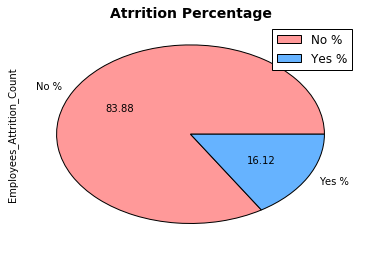

In [57]:
# Total number of employees left versus stayed in a company

Left_Stayed = D['Attrition'].value_counts().reset_index()                       # Using Dummy dataframe "D"
Left_Stayed.columns = ['Attrition', 'Employees_Attrition_Count']
print Left_Stayed

#Analysis Visualization- Pie Chart

graph = Left_Stayed.plot.pie(y='Employees_Attrition_Count',labels=('No %','Yes %'), autopct="%.2f", colors= ['#ff9999','#66b3ff'])
graph.set_title('Atrrition Percentage', fontsize=14, fontweight='bold')

**Result:** 1 out of 7 employees leave the company.

### 4.2 Job Satisfaction - Employees Left Vs. Employees Stayed

  Attrition  Avg_Job_Satisfaction
0        No              2.778589
1       Yes              2.468354


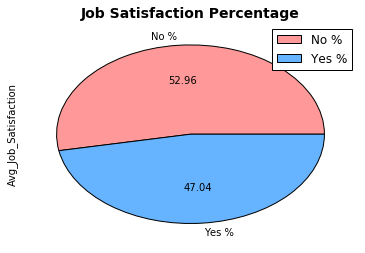

In [59]:
# Total number of employees satisfied with their jobs in a company

Job_Satisfaction_Left_Stayed = D[['Attrition', 'JobSatisfaction']].groupby('Attrition').mean().reset_index()
Job_Satisfaction_Left_Stayed.columns = ['Attrition', 'Avg_Job_Satisfaction']
print Job_Satisfaction_Left_Stayed

#Analysis Visualization- Pie Chart

graph = Job_Satisfaction_Left_Stayed.plot.pie(y='Avg_Job_Satisfaction',labels=('No %','Yes %'), autopct="%.2f", colors=['#ff9999','#66b3ff'])       #Use the links for colors: https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f
graph.set_title('Job Satisfaction Percentage', fontsize=14, fontweight='bold')

### 4.3 Job Role Satisfaction - Employees Left Vs. Employees Stayed

                     JobRole  Avg_Job_Satisfaction
0  Healthcare Representative              2.786260
1            Human Resources              2.557692
2      Laboratory Technician              2.691120
3                    Manager              2.705882
4     Manufacturing Director              2.682759
5          Research Director              2.700000
6         Research Scientist              2.773973
7            Sales Executive              2.754601
8       Sales Representative              2.734940


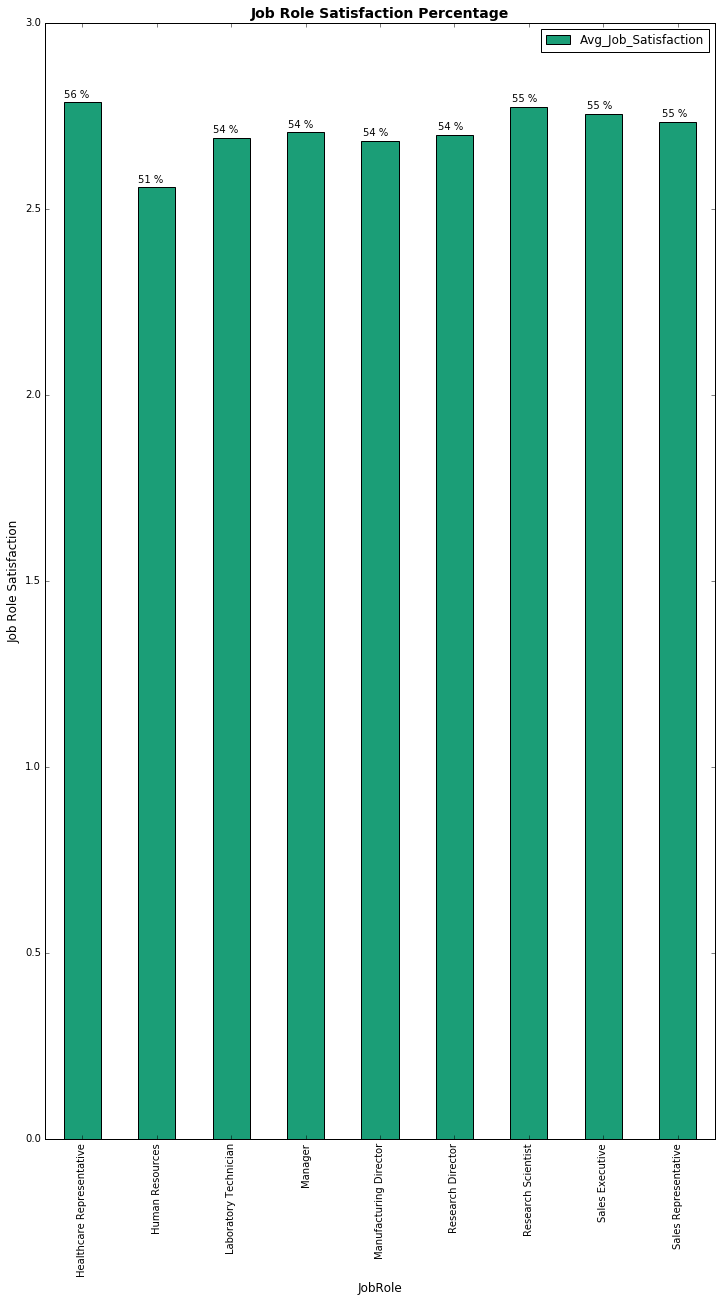

In [45]:
# Total number of employess satisfied with their Job Role in a company

Job_Left_Stayed = D[['JobRole', 'JobSatisfaction']].groupby('JobRole').mean().reset_index()
Job_Left_Stayed.columns = ['JobRole', 'Avg_Job_Satisfaction']
print Job_Left_Stayed

#Analysis Visualization- Bar Chart

graph = Job_Left_Stayed.plot(kind='bar',figsize=(12,20),legend=True, colormap='Dark2')                   # For colormap visit : http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps
graph.set_xticklabels(Job_Left_Stayed.JobRole)
graph.set_title('Job Role Satisfaction Percentage', fontsize=14, fontweight='bold')
graph.set_xlabel('JobRole',fontsize=12)
graph.set_ylabel('Job Role Satisfaction',fontsize=12)

for p in graph.patches:
    graph.annotate(("%.0f "% (p.get_height()/.05))+ "%", (p.get_x() * 1.005, p.get_height() * 1.005))     # Display % on the top of the bars


**Result:** Healthcare employees are more satisfied with their jobs (56%) and Human Resoucre employees are least satisfied with their jobs (51%).

## 5. Machine Learning Models

* The prediction of Employee Attrition in the dataset requires the Binary Classification Model which decides the Attrition variable as 'Yes/No'. 
* Used 6 different models : 
    * Naive Bayes
    * Decision Tree
    * Random Forest
    * Support Vector Classifier
    * KNN
    * LogisticRegression
* Accuracy and Confusion Matrix for each model was computed.

### 5.1 Naive Bayes

In this analysis we used the naive bayes classification to predict the attrition in the test data. 
Naive Bayes is a model mainly used for classification.

**The input variables are:** 
'DailyRate', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 'OverTimeInt', 'BT_Non-Travel', 'BT_Travel_Frequently', 'BT_Travel_Rarely', 'Dept._Research & Development', 'Dept._Sales', 'Status_Divorced', 'Status_Married', 'Status_Single', 'Years:18-28', 'Years:29-39', 'Years:40-50', 'Miles:1-10', 'Miles:11-20', 'Miles:21-30', 'HoursWorked_per_Day'
 
 **The Label is:** 'AttritionInt' designated as Y.

In [60]:
from sklearn.naive_bayes import GaussianNB                          # Library imported for Naive Bayes
from sklearn.metrics import accuracy_score                          # Library imported to display accuracy

X_train = train.drop(['AttritionInt'], axis=1)                      # X_train contains all the features except the lable "AttritionInt"
Y_train = train.AttritionInt
X_test = test.drop(['AttritionInt'], axis=1)
Y_test = test.AttritionInt

clf=GaussianNB()
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)                                        # Output of the model

# calculate classification accuracy
from sklearn import metrics
NB_Accuracy = (metrics.accuracy_score(Y_test, Y_pred)) * 100
print "Naive Bayes Accuracy % = {} %".format(NB_Accuracy)

# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(Y_test, Y_pred)
TP = confusion[0][0]
TN = confusion[1][1]
FP = confusion[0][1]
FN = confusion[1][0]

print 'True Positives:', TP
print 'True Negatives:', TN
print 'False Positives:', FP
print 'False Negatives:', FN

# confusion matrix
print metrics.confusion_matrix(Y_test, Y_pred)

Naive Bayes Accuracy % = 82.1917808219 %
True Positives: 54
True Negatives: 6
False Positives: 11
False Negatives: 2
[[54 11]
 [ 2  6]]


### 5.2 Decision Tree

A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility.Decision tree learning uses a decision tree as a predictive model which maps observations about an item to conclusions about the item's target value.
Our target type is boolean, so based on the parameters, it assigns the value of either 0 or 1 to the Y-target.

In [61]:
from sklearn import tree                                               # Library imported for Decision Tree Classifier

clf = tree.DecisionTreeClassifier(random_state=20)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)                                           # Output of the model

# calculate classification accuracy
from sklearn import metrics
DT_Accuracy = (metrics.accuracy_score(Y_test, Y_pred)) * 100
print "Decision Tree Accuracy % = {} %".format(DT_Accuracy)

# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(Y_test, Y_pred)
TP = confusion[0][0]
TN = confusion[1][1]
FP = confusion[0][1]
FN = confusion[1][0]

print 'True Positives:', TP
print 'True Negatives:', TN
print 'False Positives:', FP
print 'False Negatives:', FN

# confusion matrix
print metrics.confusion_matrix(Y_test, Y_pred)


Decision Tree Accuracy % = 80.8219178082 %
True Positives: 57
True Negatives: 2
False Positives: 8
False Negatives: 6
[[57  8]
 [ 6  2]]


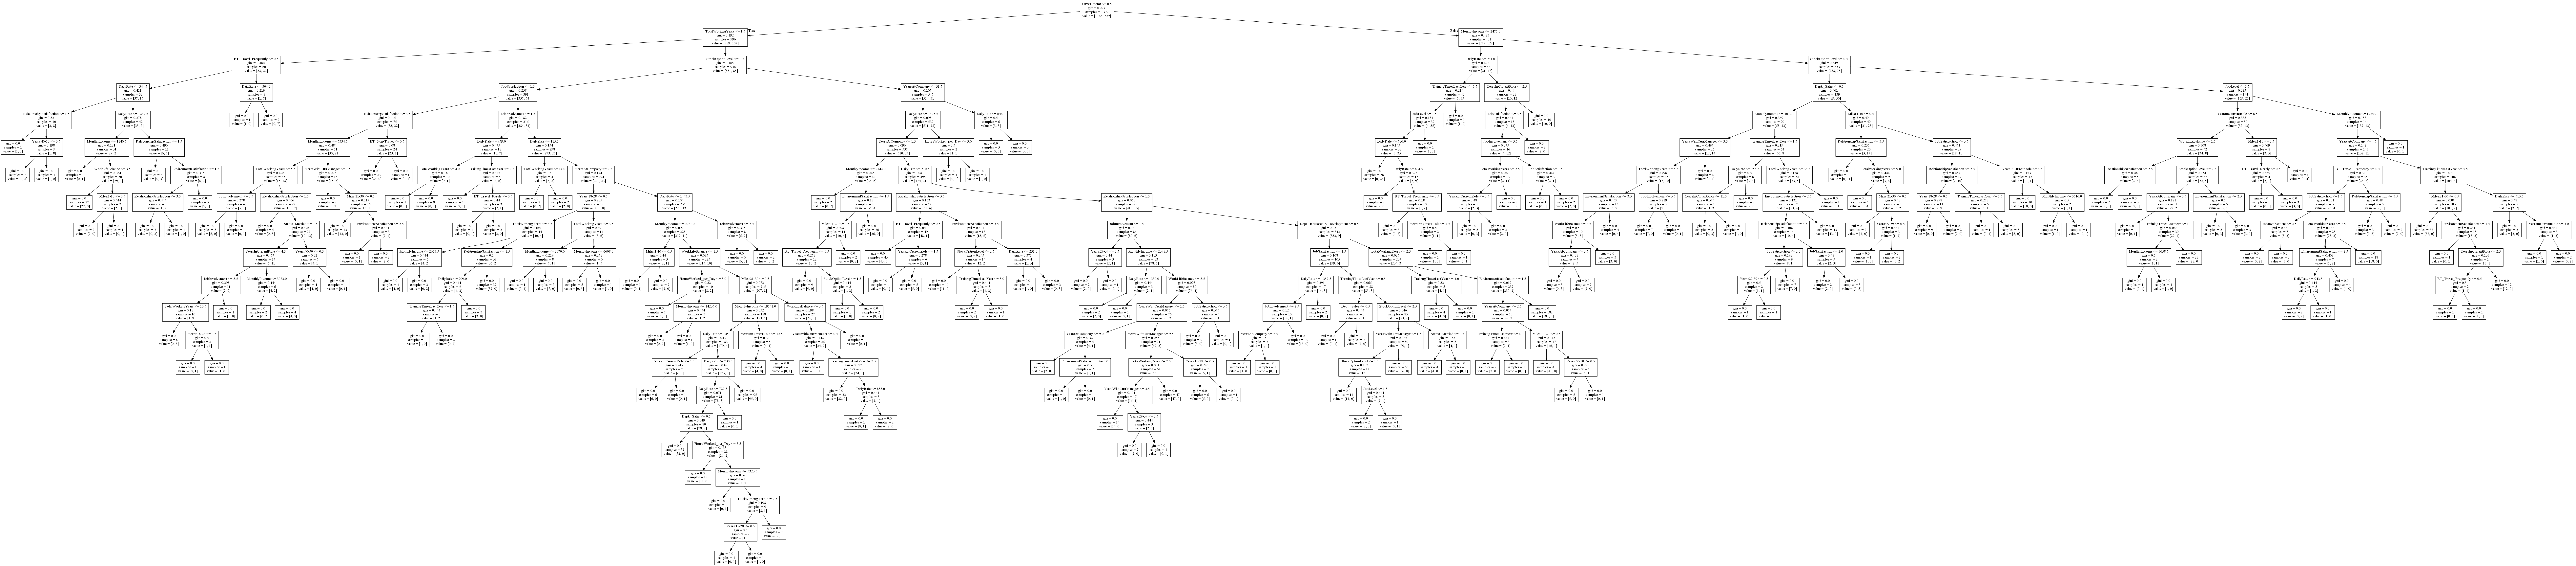

In [21]:
# Visualize the decision Tree
from sklearn import tree
from sklearn.tree import export_graphviz                                                    # Install graphviz package in Anaconda IDE
from graphviz import Source

graph = Source( tree.export_graphviz(clf, out_file=None, feature_names=X_train.columns))
png_bytes = graph.pipe(format='png')                                                          # Coverting in png and storing the bytes of the image to display later on

# To save the image of Decision Tree "dt" in the computer system 
with open('dt.png','wb') as f:
    f.write(png_bytes)

# To display the tree in the output   
from IPython.display import Image                                                             # Importing the library to visualize the image in Jupyter notebook (IPython Notebook)
Image(png_bytes)

### 5.3 Random Forest

Random forests operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Randomness of 15 gave us the maximum accuracy. 

In [22]:
from sklearn.ensemble import RandomForestClassifier                     # Library imported for Random Forest Classifier

rf = RandomForestClassifier(min_samples_split=30, random_state=15)
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)                                            # Output of the model

# calculate classification accuracy
from sklearn import metrics
RF_Accuracy = (metrics.accuracy_score(Y_test, Y_pred)) * 100
print "Random Forest Accuracy % = {} %".format(RF_Accuracy)

# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(Y_test, Y_pred)
TP = confusion[0][0]
TN = confusion[1][1]
FP = confusion[0][1]
FN = confusion[1][0]

print 'True Positives:', TP
print 'True Negatives:', TN
print 'False Positives:', FP
print 'False Negatives:', FN

# confusion matrix
print metrics.confusion_matrix(Y_test, Y_pred)

Random Forest Accuracy % = 87.6712328767 %
True Positives: 64
True Negatives: 0
False Positives: 1
False Negatives: 8
[[64  1]
 [ 8  0]]


### 5.4 Support Vector Classifier (SVC)

SVC aims to maximise the gap between the two classes, and categorize the observations within by maximising the distance between clusters. 

In [23]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

model =SVC()
X_svmtrain,X_svmtest,y_svmtrain,y_svmtest=train_test_split(churn_data_new,churn_data_new.AttritionInt,random_state=40)

model=model.fit(X_svmtrain,y_svmtrain)
model.score(X_svmtest,y_svmtest)
Y_pred = model.predict(X_svmtest)                                         # Output of the model

# calculate classification accuracy
DT_Accuracy = (metrics.accuracy_score(y_svmtest, Y_pred)) * 100
print "SVC Accuracy % = {} %".format(DT_Accuracy)

# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_svmtest, Y_pred)
TP = confusion[0][0]
TN = confusion[1][1]
FP = confusion[0][1]
FN = confusion[1][0]

print 'True Positives:', TP
print 'True Negatives:', TN
print 'False Positives:', FP
print 'False Negatives:', FN

# confusion matrix
print metrics.confusion_matrix(y_svmtest, Y_pred)

SVC Accuracy % = 84.5108695652 %
True Positives: 311
True Negatives: 0
False Positives: 0
False Negatives: 57
[[311   0]
 [ 57   0]]


### 5.5 KNN Classifier (K=20)

The K-Nearest Neighbor (KNN) is a supervised Classifier is a simple classifier that works well on basic recognition problems, stores all available cases and classifies new cases based on a similarity measure.The k value is 20, as it gave us the maximum accuracy.

In [24]:
from sklearn.neighbors import KNeighborsClassifier                # Library imported for KNN Classifier

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)                                      # Output of the model                                       

# calculate classification accuracy
from sklearn import metrics
knn_Accuracy = (metrics.accuracy_score(Y_test, Y_pred)) * 100
print "Knn Accuracy % = {} %".format(knn_Accuracy)

# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(Y_test, Y_pred)
TP = confusion[0][0]
TN = confusion[1][1]
FP = confusion[0][1]
FN = confusion[1][0]

print 'True Positives:', TP
print 'True Negatives:', TN
print 'False Positives:', FP
print 'False Negatives:', FN

# confusion matrix
print metrics.confusion_matrix(Y_test, Y_pred)

Knn Accuracy % = 87.6712328767 %
True Positives: 64
True Negatives: 0
False Positives: 1
False Negatives: 8
[[64  1]
 [ 8  0]]


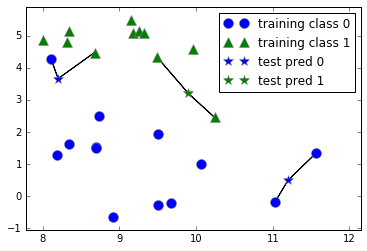

In [25]:
# Visualization Of KNN Model
import mglearn.plots                                         # Install mglearn package in the Anaconda IDE

X, Y = mglearn.datasets.make_forge()
 
mglearn.plots.plot_knn_classification(n_neighbors=2)         # Distance of the point from 2 neighbours   
plt.show()

### 5.6 LogisticRegression 

The logistic model is a statistical model with input (independent variable) a continuous variable and output (dependent variable) a binary variable, where a unit change in the input multiplies the odds of the two possible outputs by a constant factor. Since our 'Y' attribute is boolean, we can use logistic regression to predict the class. 

In [26]:
from sklearn.linear_model import LogisticRegression                      # Library imported for Logistic-Regression Classifier

logReg= LogisticRegression(C=1e9, random_state=12)
logReg.fit(X_train, Y_train)
predictions = logReg.predict(X_test)                                     # Output of the model 

# calculate classification accuracy
score = (logReg.score(X_test, Y_test))*100
print "Logistic-Regression Accuracy % = {} %".format(score)

# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(Y_test, Y_pred)
TP = confusion[0][0]
TN = confusion[1][1]
FP = confusion[0][1]
FN = confusion[1][0]

print 'True Positives:', TP
print 'True Negatives:', TN
print 'False Positives:', FP
print 'False Negatives:', FN

# confusion matrix
print metrics.confusion_matrix(Y_test, Y_pred)

Logistic-Regression Accuracy % = 90.4109589041 %
True Positives: 64
True Negatives: 0
False Positives: 1
False Negatives: 8
[[64  1]
 [ 8  0]]


## 6. Visualization

From all the models created, we need to use the best one which shows the highest accuracy percentages for the data selected. 

### 6.1 Accuracy Percent of all the Models

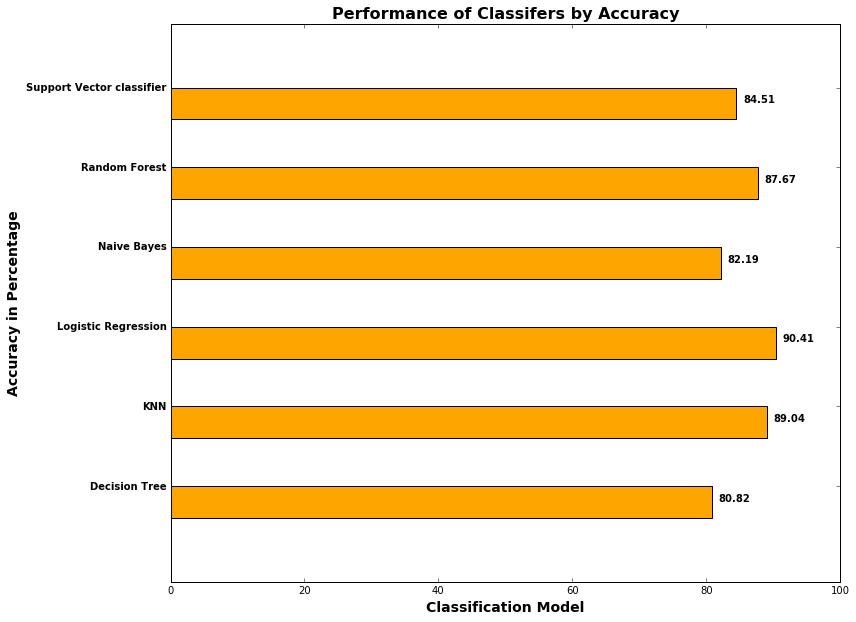

In [27]:
x = [u'Decision Tree',  u'KNN', u'Logistic Regression', u'Naive Bayes', u'Random Forest', u'Support Vector classifier']
y = [80.82, 89.04, 90.41, 82.19, 87.67, 84.51]

fig, ax = plt.subplots(figsize=(12,10))    
width = 0.4                                                  # the width of the bars 
ind = np.arange(len(y))                                      # the x locations for the groups
ax.barh(ind, y, width, color="orange", align= 'center')

ax.set_yticks(ind+width/2)                                   # Labelling of the axis and data
ax.set_yticklabels(x, minor=False, fontweight='bold')
plt.title('Performance of Classifers by Accuracy',fontsize=16,fontweight='bold')
plt.xlabel('Classification Model',fontsize=14,fontweight='bold')
plt.ylabel('Accuracy in Percentage',fontsize=14,fontweight='bold')      
for i, v in enumerate(y):
    ax.text(v + 1, i + .01, str(v), color='black',fontsize=10, fontweight='bold')

**Result:** "Logistic Regression" model has the maximum accuracy of 90.41% out of the other models. 

### 6.2 ROC of LogisticRegression Model 

AUC is an abbrevation for area under the curve. It is used in classification analysis in order to determine which of the used models predicts the classes best. Since we have found the accuracy rate as 90%, we need to plot the ROC to get the visual understanding of the AUROC.

[ 0.10573215  0.60841321  0.0638447   0.00804602  0.00626884  0.08483758
  0.09118277  0.03002619  0.10330645  0.70442784  0.02187841  0.10281032
  0.05028047  0.05726105  0.05285244  0.46899694  0.0117658   0.07094622
  0.08246779  0.01063511  0.05142557  0.01738709  0.07095613  0.01507291
  0.28549302  0.05330461  0.16817652  0.055581    0.10238327  0.09144577
  0.13419061  0.06739887  0.1866645   0.10849237  0.03101791  0.08239484
  0.0516992   0.02923267  0.2605051   0.18577967  0.20317328  0.01498623
  0.54719491  0.01242612  0.08989238  0.00493764  0.07745283  0.03490772
  0.0509668   0.10664387  0.16691742  0.01092572  0.13253976  0.0352898
  0.61911143  0.00935481  0.12358982  0.08838363  0.08124405  0.08836753
  0.03399843  0.30572389  0.00430054  0.14712635  0.03308734  0.38591089
  0.01021449  0.06658538  0.36598001  0.07820474  0.5815398   0.12806684
  0.04136732]


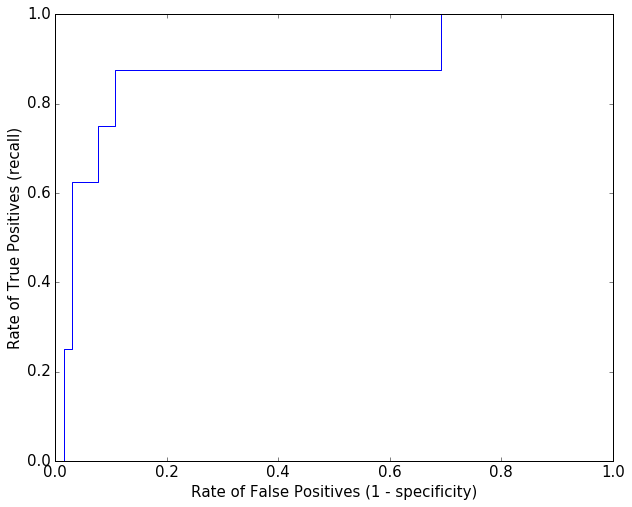

In [28]:
# Display the predicted probabilty of Logistic-Regression Model
y_pred_prob = logReg.predict_proba(X_test)[:,1]
print(y_pred_prob)

#set up graph size and font size
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 15

#plot the ROC curve 
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Rate of False Positives (1 - specificity)')
plt.ylabel('Rate of True Positives (recall)')


### 6.3 Features Importance for LogisticRegression Model

Using the logistic Regression model, we now need to find out which factors are key to determining the attrition of employees.

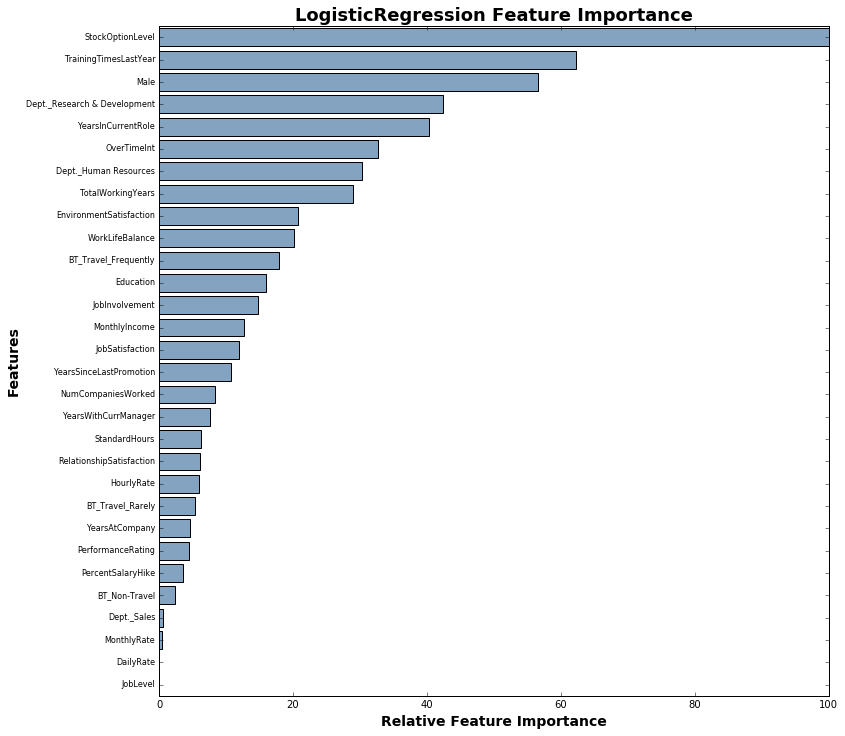

In [74]:
# Display the Features used by Logistic-Regression Model according to their importance

feature_importance = abs(logReg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())       # Create an array "Feature_importance" according to importance %
sorted_idx = np.argsort(feature_importance)                                        # Sort in the descending order
pos = np.arange(sorted_idx.shape[0]) + .5

# Plot the Bar Graph 

featfig = plt.figure(figsize=(12,12))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color=(0.2, 0.4, 0.6, 0.6))
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance', fontsize=14, fontweight='bold')
featax.set_ylabel('Features', fontsize=14, fontweight='bold')
featax.set_title('LogisticRegression Feature Importance', fontsize=18, fontweight='bold')

## 7. Result

* Using the "Logistic Regression" model we were able to the predict the attrition of IBM employees to an accuracy of 90.41 %.

* THE MAIN FACTORS THAT CONTRIBUTE TO THE DECISION OF LEAVING OR STAYING IN THE COMPANY ARE:
    1. Stock Option Level
    2. Training within the last year
    3. Years in the current role 